In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random

import lightgbm as lgb

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
sample_submission = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv")
train = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/test.csv")

In [4]:
sample_submission.head()

,id,target
0,900000,0.50000
1,900001,0.50000
2,900002,0.50000
3,900003,0.50000
4,900004,0.50000


In [5]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   target  700000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 10.7 MB


In [6]:
sample_submission.describe()

,id,target
count,700000.00000,700000.00000
mean,1249999.50000,0.50000
std,202072.73855,0.00000
min,900000.00000,0.50000
25%,1074999.75000,0.50000
50%,1249999.50000,0.50000
75%,1424999.25000,0.50000
max,1599999.00000,0.50000


In [7]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [9]:
train

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,1.38014,-0.03888,0.59711,0.85456,0.68430,-1.05862,1.31070,2,1,2,0,0,5,3,0,2,0,0,2,-4.06137,-2.64365,-2.17385,-1.59474,0.52202,0.83305,2.71413,1.29009,BABBCBBBED,455.03385,0,2,1
899996,899996,-1.36979,0.04484,0.01546,0.37656,-0.38053,-0.83081,-1.79846,4,1,2,4,3,1,4,1,2,2,0,0,-1.72198,0.74179,-5.19060,2.41390,-0.67494,-0.41211,-0.03044,-3.14405,BBBGBBDQBE,134.70358,0,1,0
899997,899997,1.38620,-0.96115,0.72599,-0.13284,0.87391,-0.24534,-1.04579,0,0,6,4,1,3,1,2,3,2,3,0,-1.26582,1.23001,-1.36183,-0.15193,-4.56077,-1.24915,1.79354,2.25370,AEBEDBBHBA,-99.53631,0,1,0
899998,899998,-1.59057,-0.50994,-1.71540,-0.24999,1.35993,1.65081,-0.05859,0,2,2,2,2,2,1,2,2,2,2,5,1.03525,2.45081,-2.57782,2.42367,2.11001,0.56127,-2.14961,1.01998,ADBAAADDAE,47.82304,1,2,0


In [10]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.44252,0.17438,-0.99982,0.76274,0.18678,-1.07477,0.50189,6,6,0,0,0,5,1,1,2,2,0,1,-1.12837,2.74935,-1.00640,-1.19388,-2.43574,-2.42743,-1.96689,5.73420,BAAABADLAC,99.47842,0,0
1,900001,-0.60560,-0.30571,0.62767,-0.57890,-1.75093,1.35555,-0.19091,1,3,4,0,2,1,3,0,0,0,2,0,-4.42410,1.08076,2.38240,0.14944,1.88332,-2.84871,-0.72515,3.19422,AFABBAEGCB,-65.99383,1,0
2,900002,0.30399,2.44511,0.24651,0.81825,0.35973,-1.33185,1.35862,3,3,4,1,1,3,2,2,4,1,0,3,-1.52386,-1.40671,-7.02610,1.31228,-5.15719,1.71400,0.58503,0.06690,BBACABBKEE,-87.40562,0,1
3,900003,0.15405,0.26013,-1.36709,-0.09318,-1.11103,-0.94848,1.11922,0,0,4,2,1,5,0,3,3,1,4,2,-1.40460,3.01108,-0.59453,-3.93948,1.75457,-2.36401,-1.00332,3.89310,AEBEAACQCC,-281.29346,0,0
4,900004,-1.65190,-0.42427,-0.66736,-0.32212,-0.08946,0.18171,1.78498,2,2,2,0,0,3,0,1,2,0,2,2,-1.96852,0.10059,0.08491,-0.98574,-0.13047,-3.55789,1.21069,1.86188,AEBBBBDABF,25.62942,0,2


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

In [12]:
test.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000,700000.00000
mean,1249999.50000,-0.00009,-0.00073,-0.00039,0.00071,0.00080,-0.00047,0.00255,2.03082,2.05692,2.36119,2.17704,1.80566,2.84274,2.23853,1.51572,2.10039,2.09391,1.85831,2.06811,0.30728,-0.17397,-0.15394,-0.00562,-0.37198,-0.34068,0.17424,0.35629,0.60421,0.34609,1.00308
std,202072.73855,1.00026,0.99713,1.00032,1.00176,0.99909,1.00025,0.99954,1.65591,1.59173,1.63669,1.64509,1.53880,1.76083,1.53697,1.36239,1.56900,1.56060,1.46849,1.56425,2.31493,2.39794,2.48420,2.45091,2.45262,2.38894,2.41756,2.47771,238.88899,0.47572,0.81967
min,900000.00000,-4.65802,-4.92272,-4.45756,-4.56742,-4.67530,-5.14136,-4.78216,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-11.41902,-11.08991,-12.18678,-11.70081,-12.10448,-11.83842,-13.31278,-13.46249,-1204.24372,0.00000,0.00000
25%,1074999.75000,-0.67571,-0.67404,-0.67596,-0.67456,-0.67470,-0.67444,-0.67148,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,-1.23738,-1.79476,-1.81674,-1.64103,-2.02134,-1.94892,-1.44382,-1.26399,-158.66092,0.00000,0.00000
50%,1249999.50000,-0.00039,-0.00024,-0.00072,-0.00029,0.00028,-0.00167,0.00262,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,2.00000,1.00000,2.00000,2.00000,2.00000,2.00000,0.32650,-0.18494,-0.14910,0.03373,-0.39628,-0.33943,0.16523,0.39998,0.67139,0.00000,1.00000
75%,1424999.25000,0.67579,0.67142,0.67310,0.67638,0.67454,0.67415,0.67659,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,3.00000,2.00000,3.00000,3.00000,3.00000,3.00000,1.87426,1.44710,1.50805,1.66415,1.25136,1.26988,1.79443,2.02516,159.78901,1.00000,2.00000
max,1599999.00000,5.76195,4.76807,4.59990,4.89990,4.49431,4.70100,4.67315,16.00000,13.00000,16.00000,15.00000,14.00000,15.00000,13.00000,12.00000,14.00000,13.00000,13.00000,13.00000,11.78043,10.69137,11.99949,10.99160,11.36665,10.23655,11.29434,12.81198,1141.95733,1.00000,2.00000


# EDA

In [13]:
# Colors to be used for plots
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen", "lightseagreen",
          "cornflowerblue", "mediumpurple", "palevioletred", "lightskyblue", "sandybrown",
          "yellowgreen", "indianred", "lightsteelblue", "mediumorchid", "deepskyblue"]

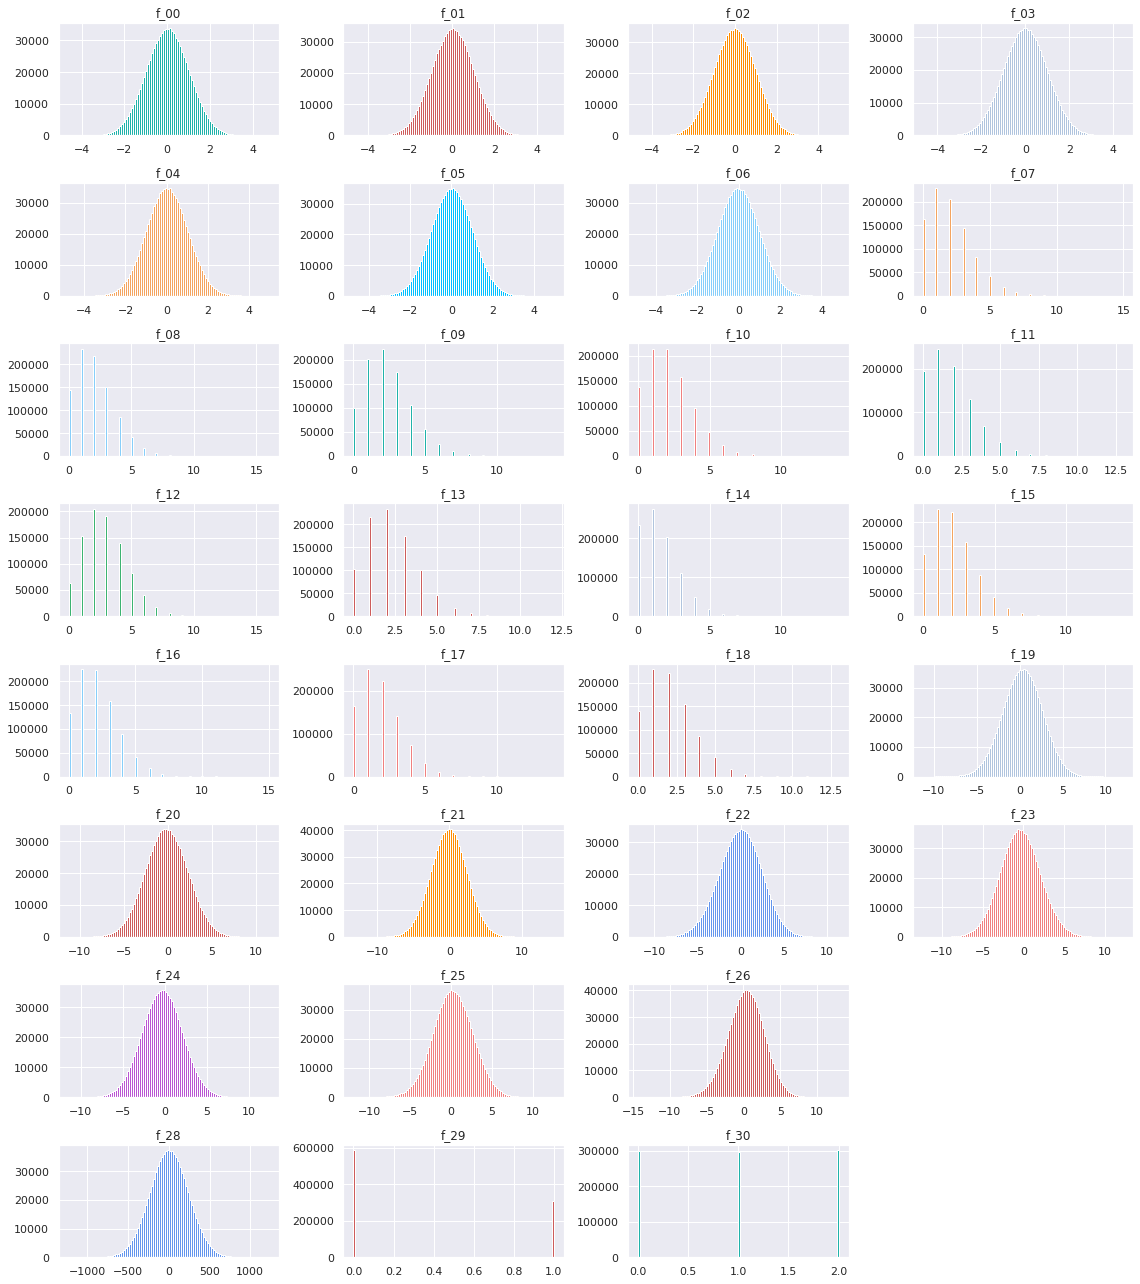

In [14]:
figure = plt.figure(figsize=(16, 18))
for feat in range(31):
    feat_name = f'f_{feat:02d}'
    if(feat_name != 'f_27'):
        plt.subplot(8, 4, feat+1)
        plt.hist(train[feat_name], bins=100, color=random.choice(colors))
        plt.title(f'{feat_name}')
figure.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

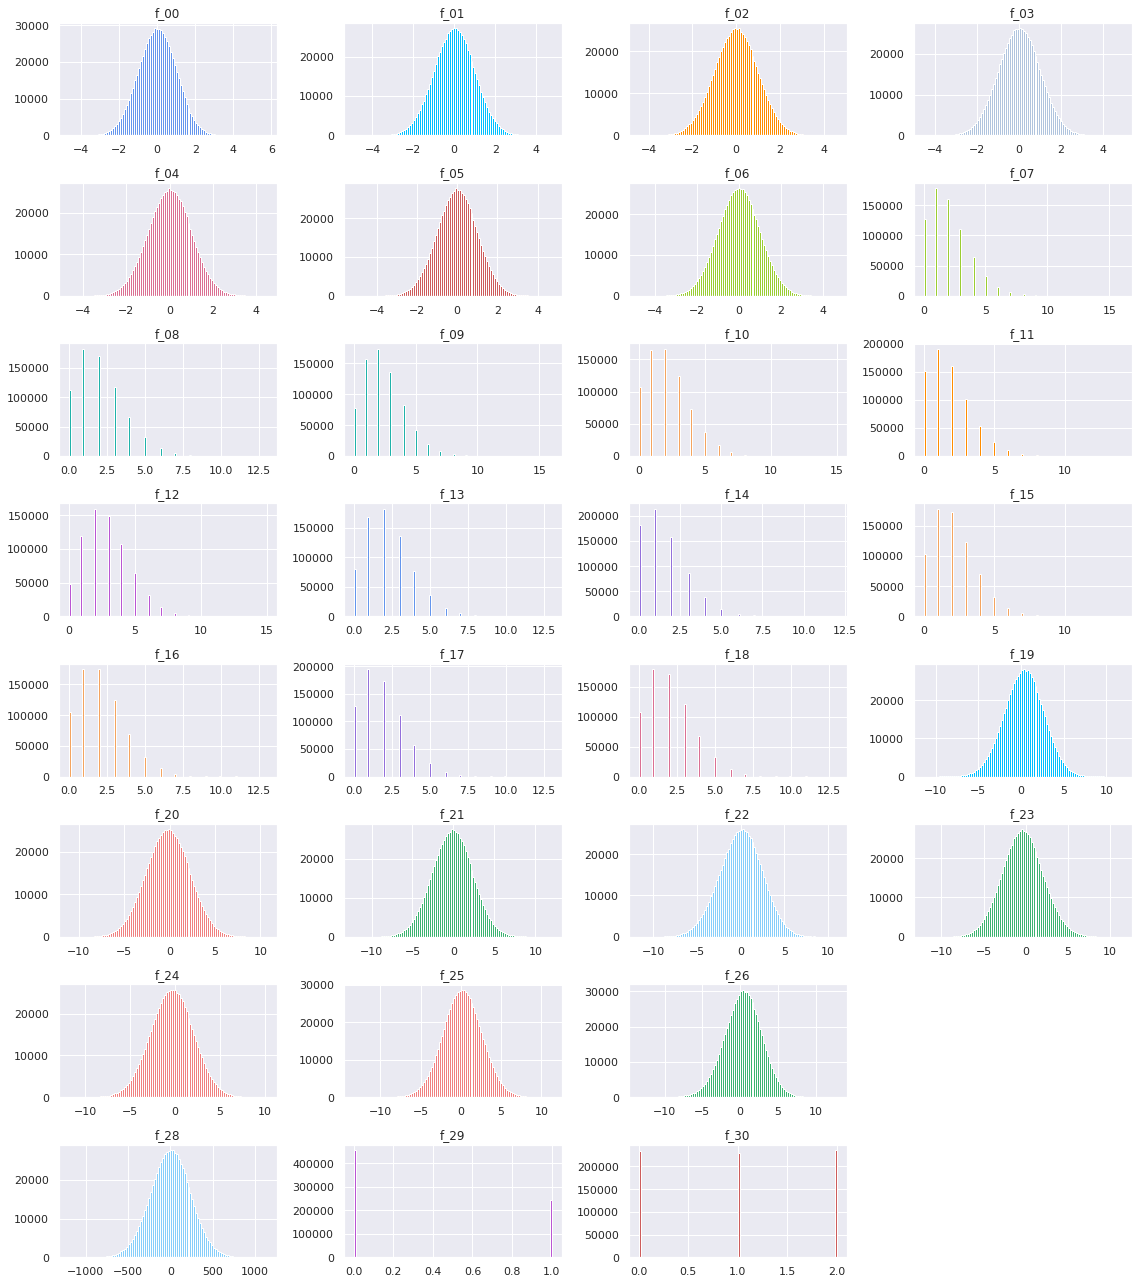

In [15]:
figure = plt.figure(figsize=(16, 18))
for feat in range(31):
    feat_name = f'f_{feat:02d}'
    if(feat_name != 'f_27'):
        plt.subplot(8, 4, feat+1)
        plt.hist(test[feat_name], bins=100, color=random.choice(colors))
        plt.title(f'{feat_name}')
figure.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

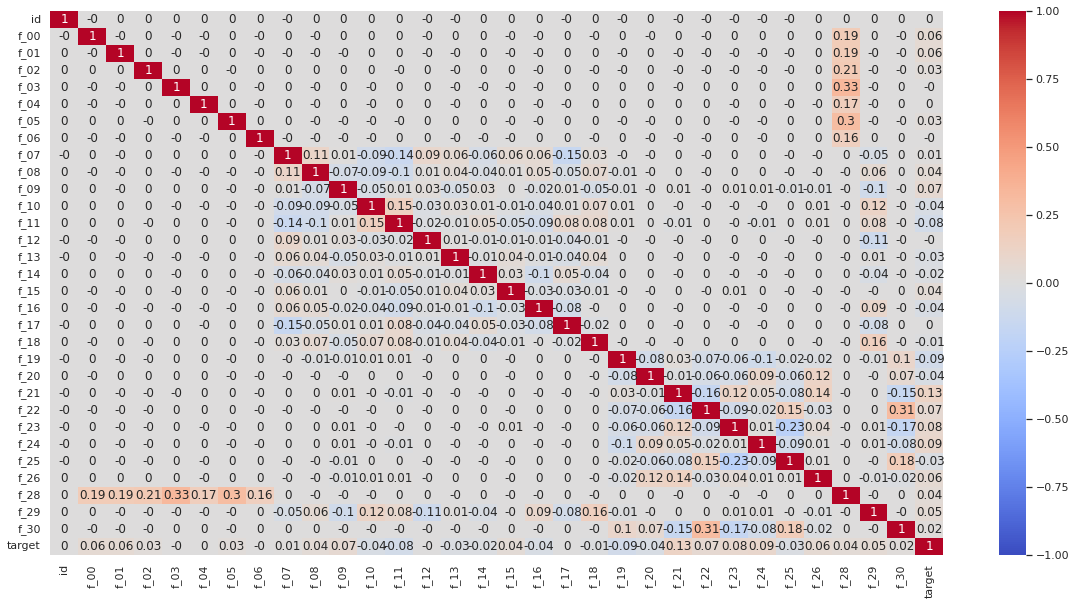

In [16]:
corr = train.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

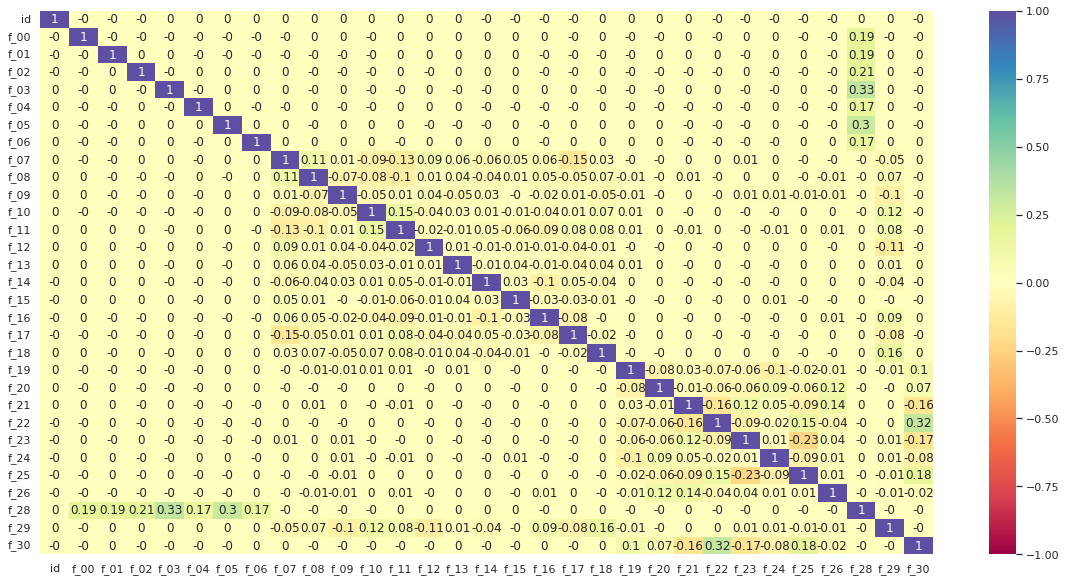

In [17]:
corr = test.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='Spectral')
plt.show()

In [18]:
# Concat train and test
all_data = pd.concat([train,test],ignore_index=True)

In [19]:
all_data.drop(columns=['id', 'target']).describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='Greens')\
        .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
f_00,1600000.000000,-0.000199,0.999490,-4.658018,-0.675592,0.000437,0.674935,5.761950
f_01,1600000.000000,0.000335,0.998291,-4.922718,-0.674721,0.000905,0.673461,4.815699
f_02,1600000.000000,0.000492,1.000428,-4.642676,-0.675056,0.000971,0.675678,4.961982
f_03,1600000.000000,-0.000461,1.000868,-4.658816,-0.675469,-0.001410,0.674252,4.899904
f_04,1600000.000000,0.000029,0.999695,-4.748501,-0.675402,-0.000830,0.674142,4.948983
f_05,1600000.000000,-0.000045,1.000038,-5.141356,-0.673939,-0.000936,0.674632,4.971881
f_06,1600000.000000,0.000716,0.999765,-4.842919,-0.673268,0.000213,0.675541,4.822668
f_07,1600000.000000,2.031179,1.656057,0.000000,1.000000,2.000000,3.000000,16.000000
f_08,1600000.000000,2.057527,1.591292,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,1600000.000000,2.361889,1.637264,0.000000,1.000000,2.000000,3.000000,16.000000


# Preprosessing

In [20]:
%%time
# Divide f_27 into characters

tmp_all = all_data
for i in range(10):
    temp = []
    for j in range(len(tmp_all)):
        temp.append(tmp_all['f_27'][j][i])
    tmp_all['f_27_' + str(i + 1)] = temp
tmp_all

CPU times: user 2min 5s, sys: 21 ms, total: 2min 5s
Wall time: 2min 5s


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0.00000,A,B,A,B,D,A,D,B,A,B
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1.00000,A,C,A,C,C,A,D,C,E,B
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1.00000,A,A,A,E,A,B,C,K,A,D
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1.00000,B,D,B,B,A,A,C,B,C,B
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1.00000,B,D,B,C,B,B,C,H,F,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,1599995,0.64011,0.89781,-0.52396,1.56376,-0.09228,-0.61087,0.53543,0,1,6,2,5,3,4,2,2,3,0,2,0.76519,-2.18519,2.60405,1.12287,0.51811,1.24384,0.57511,0.07637,BCBCEBHMCD,204.18654,0,0,NaN,B,C,B,C,E,B,H,M,C,D
1599996,1599996,-0.19177,-0.03525,-0.11853,0.58475,2.12698,0.56866,-0.05266,4,3,4,2,0,2,3,2,2,3,3,0,-0.89507,-0.23955,3.02986,1.38468,-1.13574,2.98271,-1.51176,2.22522,BAABCADQFC,-97.69459,0,2,NaN,B,A,A,B,C,A,D,Q,F,C
1599997,1599997,-0.33170,-0.32884,-1.18550,1.02213,-0.48310,-0.10715,-0.96828,1,1,2,1,1,3,1,0,1,3,2,1,0.17808,-0.92263,4.02127,-1.84527,1.09601,-2.73451,-4.88596,-2.24874,AAAJCBGQBA,130.62274,1,0,NaN,A,A,A,J,C,B,G,Q,B,A
1599998,1599998,-2.03107,-1.23840,0.96470,-1.04595,0.90606,0.63430,-0.70747,5,1,1,3,0,2,4,2,4,6,0,0,4.04310,-3.08000,1.45386,-1.69661,1.01900,1.97370,-0.35307,-3.33345,BCBBCABNDE,-364.62515,0,0,NaN,B,C,B,B,C,A,B,N,D,E


In [21]:
%%time
# Calculate the appearance rate

A_count = 0
B_count = 0
C_count = 0
D_count = 0
E_count = 0
F_count = 0
G_count = 0
H_count = 0
I_count = 0
J_count = 0
K_count = 0
L_count = 0
M_count = 0
N_count = 0
O_count = 0
P_count = 0
Q_count = 0
R_count = 0
S_count = 0
T_count = 0
U_count = 0
V_count = 0
W_count = 0
X_count = 0
Y_count = 0
Z_count = 0

for i in range(10):
    for j in range(160000):
        txt = tmp_all['f_27_' + str(i + 1)][j]
        if(txt == 'A'):
            A_count += 1
        elif(txt == 'B'):
            B_count += 1
        elif(txt == 'C'):
            C_count += 1
        elif(txt == 'D'):
            D_count += 1
        elif(txt == 'E'):
            E_count += 1
        elif(txt == 'F'):
            F_count += 1
        elif(txt == 'G'):
            G_count += 1
        elif(txt == 'H'):
            H_count += 1
        elif(txt == 'I'):
            I_count += 1
        elif(txt == 'J'):
            J_count += 1
        elif(txt == 'K'):
            K_count += 1
        elif(txt == 'L'):
            L_count += 1
        elif(txt == 'M'):
            M_count += 1
        elif(txt == 'N'):
            N_count += 1
        elif(txt == 'O'):
            O_count += 1
        elif(txt == 'P'):
            P_count += 1
        elif(txt == 'Q'):
            Q_count += 1
        elif(txt == 'R'):
            R_count += 1
        elif(txt == 'S'):
            S_count += 1
        elif(txt == 'T'):
            T_count += 1
        elif(txt == 'U'):
            U_count += 1
        elif(txt == 'V'):
            V_count += 1
        elif(txt == 'W'):
            W_count += 1
        elif(txt == 'X'):
            X_count += 1
        elif(txt == 'Y'):
            Y_count += 1
        elif(txt == 'Z'):
            Z_count += 1
charAry = {'A':A_count / 1600000,
 'B':B_count / 1600000,
 'C':C_count / 1600000,
 'D':D_count / 1600000,
 'E':E_count / 1600000,
 'F':F_count / 1600000,
 'G':G_count / 1600000,
 'H':H_count / 1600000,
 'I':I_count / 1600000,
 'J':J_count / 1600000,
 'K':K_count / 1600000,
 'L':L_count / 1600000,
 'M':M_count / 1600000,
 'N':N_count / 1600000,
 'O':O_count / 1600000,
 'P':P_count / 1600000,
 'Q':Q_count / 1600000,
 'R':R_count / 1600000,
 'S':S_count / 1600000,
 'T':T_count / 1600000,
 'U':U_count / 1600000,
 'V':V_count / 1600000,
 'W':W_count / 1600000,
 'X':X_count / 1600000,
 'Y':Y_count / 1600000,
 'Z':Z_count / 1600000}
charAry

CPU times: user 14.1 s, sys: 819 µs, total: 14.1 s
Wall time: 14.1 s


{'A': 0.246374375,
 'B': 0.32451125,
 'C': 0.147964375,
 'D': 0.10280375,
 'E': 0.059604375,
 'F': 0.03139,
 'G': 0.016404375,
 'H': 0.009425625,
 'I': 0.00656875,
 'J': 0.005605625,
 'K': 0.005216875,
 'L': 0.00513875,
 'M': 0.0051225,
 'N': 0.005035625,
 'O': 0.005086875,
 'P': 0.005006875,
 'Q': 0.0048925,
 'R': 0.004884375,
 'S': 0.00458375,
 'T': 0.004379375,
 'U': 0.0,
 'V': 0.0,
 'W': 0.0,
 'X': 0.0,
 'Y': 0.0,
 'Z': 0.0}

In [22]:
# Sort by appearance rate
sortedAry = sorted(charAry.items(), key=lambda x:x[1], reverse=True)
sortedAry

[('B', 0.32451125),
 ('A', 0.246374375),
 ('C', 0.147964375),
 ('D', 0.10280375),
 ('E', 0.059604375),
 ('F', 0.03139),
 ('G', 0.016404375),
 ('H', 0.009425625),
 ('I', 0.00656875),
 ('J', 0.005605625),
 ('K', 0.005216875),
 ('L', 0.00513875),
 ('M', 0.0051225),
 ('O', 0.005086875),
 ('N', 0.005035625),
 ('P', 0.005006875),
 ('Q', 0.0048925),
 ('R', 0.004884375),
 ('S', 0.00458375),
 ('T', 0.004379375),
 ('U', 0.0),
 ('V', 0.0),
 ('W', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('Z', 0.0)]

In [23]:
le = LabelEncoder()

#tmp_all['f_27_le'] = le.fit_transform(tmp_all['f_27'])

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
le.fit(labels)

for i in range(10):
    all_data['f_27_' + str(i + 1)] = le.transform(tmp_all['f_27_' + str(i + 1)])


all_data

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0.00000,0,1,0,1,3,0,3,1,0,1
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1.00000,0,2,0,2,2,0,3,2,4,1
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1.00000,0,0,0,4,0,1,2,10,0,3
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1.00000,1,3,1,1,0,0,2,1,2,1
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1.00000,1,3,1,2,1,1,2,7,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,1599995,0.64011,0.89781,-0.52396,1.56376,-0.09228,-0.61087,0.53543,0,1,6,2,5,3,4,2,2,3,0,2,0.76519,-2.18519,2.60405,1.12287,0.51811,1.24384,0.57511,0.07637,BCBCEBHMCD,204.18654,0,0,NaN,1,2,1,2,4,1,7,12,2,3
1599996,1599996,-0.19177,-0.03525,-0.11853,0.58475,2.12698,0.56866,-0.05266,4,3,4,2,0,2,3,2,2,3,3,0,-0.89507,-0.23955,3.02986,1.38468,-1.13574,2.98271,-1.51176,2.22522,BAABCADQFC,-97.69459,0,2,NaN,1,0,0,1,2,0,3,16,5,2
1599997,1599997,-0.33170,-0.32884,-1.18550,1.02213,-0.48310,-0.10715,-0.96828,1,1,2,1,1,3,1,0,1,3,2,1,0.17808,-0.92263,4.02127,-1.84527,1.09601,-2.73451,-4.88596,-2.24874,AAAJCBGQBA,130.62274,1,0,NaN,0,0,0,9,2,1,6,16,1,0
1599998,1599998,-2.03107,-1.23840,0.96470,-1.04595,0.90606,0.63430,-0.70747,5,1,1,3,0,2,4,2,4,6,0,0,4.04310,-3.08000,1.45386,-1.69661,1.01900,1.97370,-0.35307,-3.33345,BCBBCABNDE,-364.62515,0,0,NaN,1,2,1,1,2,0,1,13,3,4


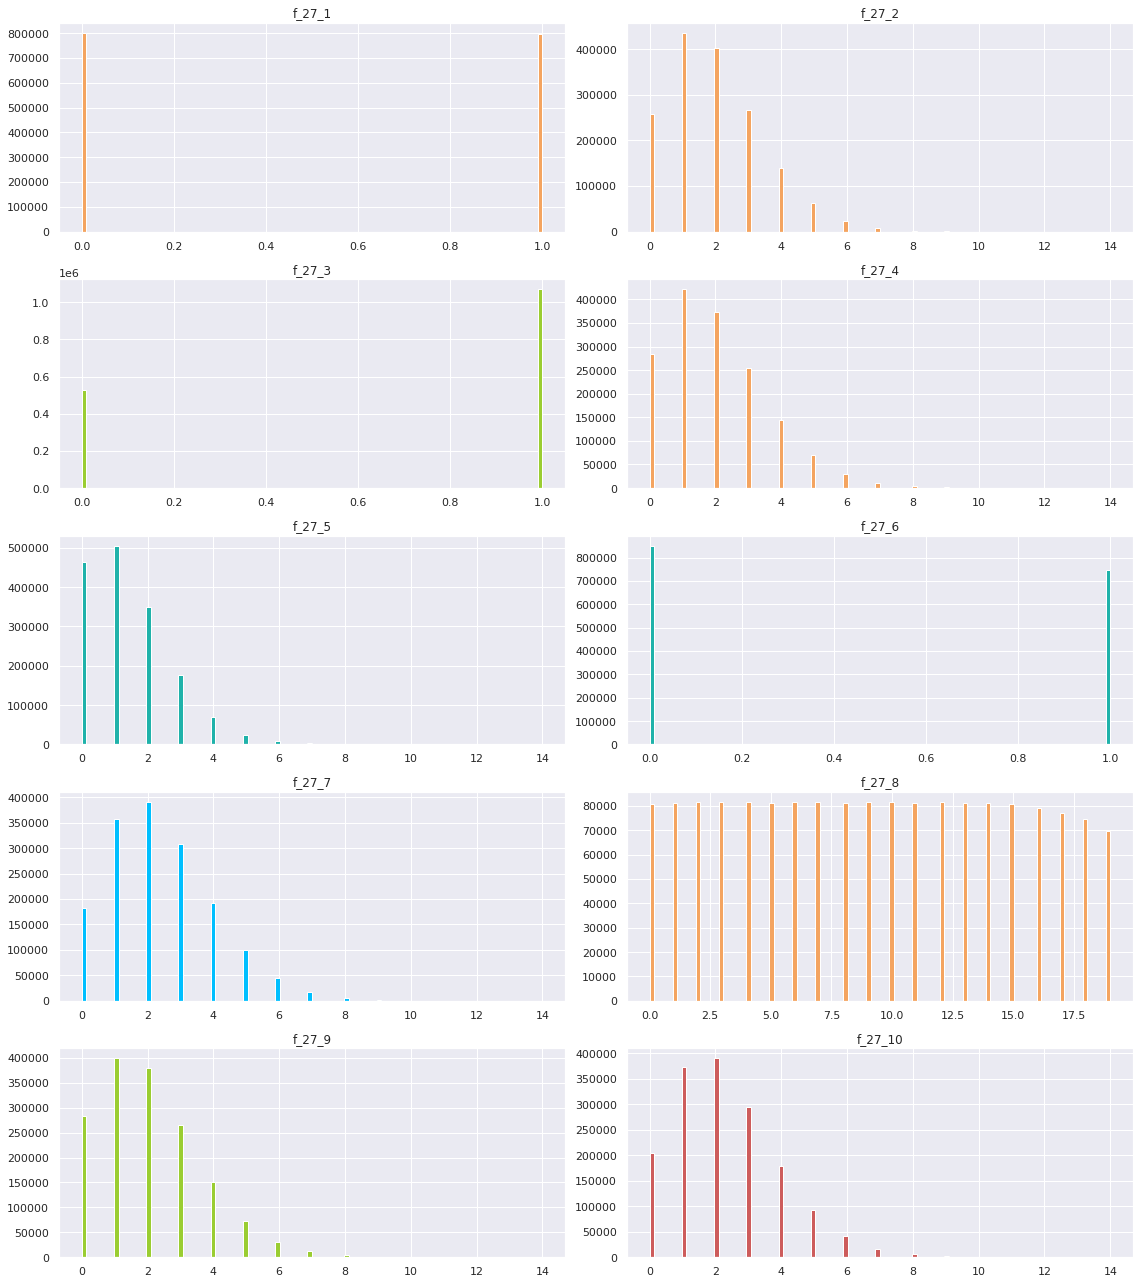

In [24]:
# Check the distribution for each of f_27_1 to f_27_10

figure = plt.figure(figsize=(16, 18))
for feat in range(10):
    feat_name = 'f_27_' + str(feat+1)
    plt.subplot(5, 2, feat+1)
    plt.hist(all_data[feat_name], bins=100, color=random.choice(colors))
    plt.title(f'{feat_name}')
figure.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

In [25]:
def feature_engineering(df):
    # How many unique characters are in f_27
    df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
    
    # I don't know about billow.
#    df['02+21'] = df['f_02'] + df['f_21']
    df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
#    df['05+22'] = df['f_05'] + df['f_22']
    df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
#    df['00+01+26'] = df['f_00'] + df['f_01'] + df['f_26']
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    
    return df

all_data = feature_engineering(all_data)

# How often the string occurs in f_27
#all_data['value_frequency'] = all_data['f_27'].map(all_data['f_27'].value_counts() / len(all_data))

all_data

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10,unique_characters,i_02_21,i_05_22,i_00_01_26
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,ABABDADBAB,67.60915,0,0,0.00000,0,1,0,1,3,0,3,1,0,1,3,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,ACACCADCEB,377.09642,0,0,1.00000,0,2,0,2,2,0,3,2,4,1,5,0,0,0
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,AAAEABCKAD,-195.59970,0,2,1.00000,0,0,0,4,0,1,2,10,0,3,6,0,0,0
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,BDBBAACBCB,210.82621,0,0,1.00000,1,3,1,1,0,0,2,1,2,1,4,0,0,0
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,BDBCBBCHFE,-217.21180,0,1,1.00000,1,3,1,2,1,1,2,7,5,4,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,1599995,0.64011,0.89781,-0.52396,1.56376,-0.09228,-0.61087,0.53543,0,1,6,2,5,3,4,2,2,3,0,2,0.76519,-2.18519,2.60405,1.12287,0.51811,1.24384,0.57511,0.07637,BCBCEBHMCD,204.18654,0,0,NaN,1,2,1,2,4,1,7,12,2,3,6,0,0,0
1599996,1599996,-0.19177,-0.03525,-0.11853,0.58475,2.12698,0.56866,-0.05266,4,3,4,2,0,2,3,2,2,3,3,0,-0.89507,-0.23955,3.02986,1.38468,-1.13574,2.98271,-1.51176,2.22522,BAABCADQFC,-97.69459,0,2,NaN,1,0,0,1,2,0,3,16,5,2,6,0,0,0
1599997,1599997,-0.33170,-0.32884,-1.18550,1.02213,-0.48310,-0.10715,-0.96828,1,1,2,1,1,3,1,0,1,3,2,1,0.17808,-0.92263,4.02127,-1.84527,1.09601,-2.73451,-4.88596,-2.24874,AAAJCBGQBA,130.62274,1,0,NaN,0,0,0,9,2,1,6,16,1,0,6,0,0,0
1599998,1599998,-2.03107,-1.23840,0.96470,-1.04595,0.90606,0.63430,-0.70747,5,1,1,3,0,2,4,2,4,6,0,0,4.04310,-3.08000,1.45386,-1.69661,1.01900,1.97370,-0.35307,-3.33345,BCBBCABNDE,-364.62515,0,0,NaN,1,2,1,1,2,0,1,13,3,4,6,0,0,-1


In [26]:
# Split all for train and test
df_train = all_data.iloc[train.index[0]:train.index[-1]+1].drop(columns=["f_27"])
df_test = all_data.iloc[train.index[-1]+1:].drop(columns=["f_27", "target"])

In [27]:
df_train

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10,unique_characters,i_02_21,i_05_22,i_00_01_26
0,0,-1.37325,0.23889,-0.24338,0.56740,-0.64771,0.83933,0.11313,1,5,1,3,3,3,1,6,1,0,7,4,0.29822,-0.91972,3.05854,-2.54074,0.76695,-2.73063,-0.20818,1.36340,67.60915,0,0,0.00000,0,1,0,1,3,0,3,1,0,1,3,0,0,0
1,1,1.69702,-1.71032,-2.23033,-0.54566,1.11317,-1.55217,0.44783,1,3,4,0,2,3,0,1,0,4,6,0,-3.14767,-1.07543,2.17905,2.27831,-0.63366,-1.21708,-3.78219,-0.05832,377.09642,0,0,1.00000,0,2,0,2,2,0,3,2,4,1,5,0,0,0
2,2,1.68173,0.61675,-1.02769,0.81049,-0.60909,0.11397,-0.70866,1,0,2,6,6,4,3,1,2,2,1,4,2.82073,-3.48534,-0.78424,-1.38578,-0.52056,-0.00912,2.78854,-3.70349,-195.59970,0,2,1.00000,0,0,0,4,0,1,2,10,0,3,6,0,0,0
3,3,-0.11817,-0.58783,-0.80464,2.08682,0.37101,-0.12883,-0.28258,3,2,1,0,1,6,4,2,3,3,0,3,1.08108,-2.10018,-2.34382,0.57259,-1.65321,1.68603,-2.53310,-0.60860,210.82621,0,0,1.00000,1,3,1,1,0,0,2,1,2,1,4,0,0,0
4,4,1.14848,-0.17657,-0.66487,-1.10134,0.46788,0.50012,0.40752,3,3,0,4,3,0,6,0,3,3,1,0,-0.12618,0.60503,1.13367,-3.91293,-1.43037,2.12765,-3.30678,4.37137,-217.21180,0,1,1.00000,1,3,1,2,1,1,2,7,5,4,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,1.38014,-0.03888,0.59711,0.85456,0.68430,-1.05862,1.31070,2,1,2,0,0,5,3,0,2,0,0,2,-4.06137,-2.64365,-2.17385,-1.59474,0.52202,0.83305,2.71413,1.29009,455.03385,0,2,1.00000,1,0,1,1,2,1,1,1,4,3,5,0,0,0
899996,899996,-1.36979,0.04484,0.01546,0.37656,-0.38053,-0.83081,-1.79846,4,1,2,4,3,1,4,1,2,2,0,0,-1.72198,0.74179,-5.19060,2.41390,-0.67494,-0.41211,-0.03044,-3.14405,134.70358,0,1,0.00000,1,1,1,6,1,1,3,16,1,4,5,0,0,0
899997,899997,1.38620,-0.96115,0.72599,-0.13284,0.87391,-0.24534,-1.04579,0,0,6,4,1,3,1,2,3,2,3,0,-1.26582,1.23001,-1.36183,-0.15193,-4.56077,-1.24915,1.79354,2.25370,-99.53631,0,1,0.00000,0,4,1,4,3,1,1,7,1,0,5,0,0,0
899998,899998,-1.59057,-0.50994,-1.71540,-0.24999,1.35993,1.65081,-0.05859,0,2,2,2,2,2,1,2,2,2,2,5,1.03525,2.45081,-2.57782,2.42367,2.11001,0.56127,-2.14961,1.01998,47.82304,1,2,0.00000,0,3,1,0,0,0,3,3,0,4,4,0,0,0


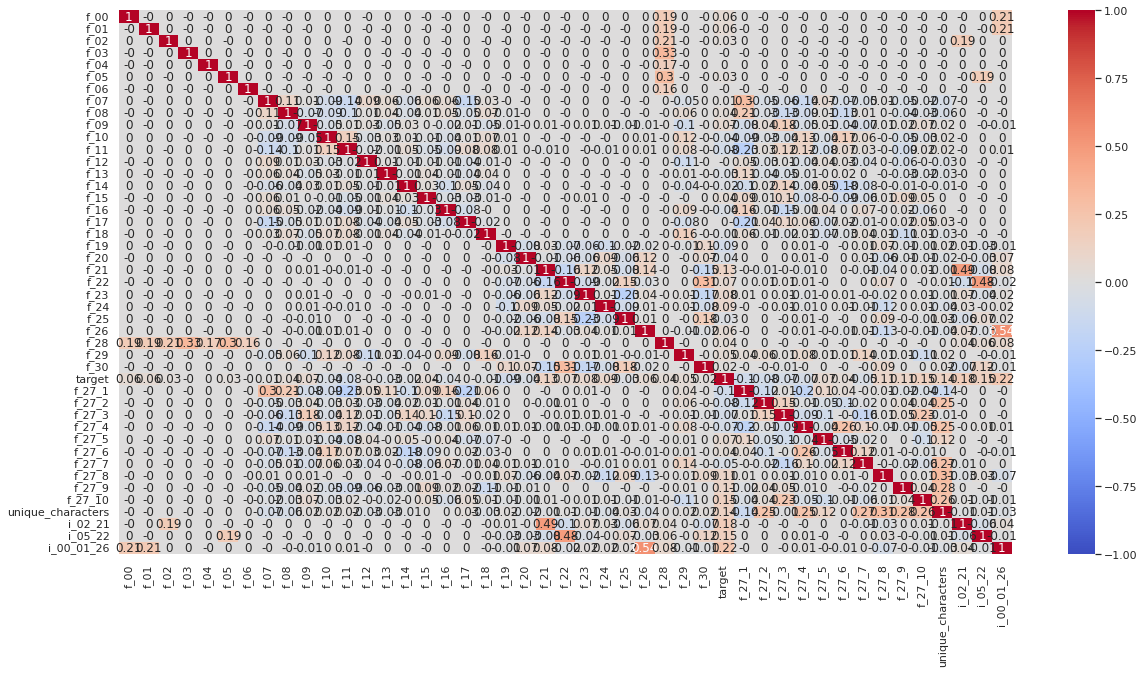

In [28]:
# Heatmap(df_train)

corr = df_train.drop(columns=['id']).corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

In [29]:
df_test

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10,unique_characters,i_02_21,i_05_22,i_00_01_26
900000,900000,0.44252,0.17438,-0.99982,0.76274,0.18678,-1.07477,0.50189,6,6,0,0,0,5,1,1,2,2,0,1,-1.12837,2.74935,-1.00640,-1.19388,-2.43574,-2.42743,-1.96689,5.73420,99.47842,0,0,1,0,0,0,1,0,3,11,0,2,5,0,0,1
900001,900001,-0.60560,-0.30571,0.62767,-0.57890,-1.75093,1.35555,-0.19091,1,3,4,0,2,1,3,0,0,0,2,0,-4.42410,1.08076,2.38240,0.14944,1.88332,-2.84871,-0.72515,3.19422,-65.99383,1,0,0,5,0,1,1,0,4,6,2,1,6,0,0,0
900002,900002,0.30399,2.44511,0.24651,0.81825,0.35973,-1.33185,1.35862,3,3,4,1,1,3,2,2,4,1,0,3,-1.52386,-1.40671,-7.02610,1.31228,-5.15719,1.71400,0.58503,0.06690,-87.40562,0,1,1,1,0,2,0,1,1,10,4,4,5,-1,0,0
900003,900003,0.15405,0.26013,-1.36709,-0.09318,-1.11103,-0.94848,1.11922,0,0,4,2,1,5,0,3,3,1,4,2,-1.40460,3.01108,-0.59453,-3.93948,1.75457,-2.36401,-1.00332,3.89310,-281.29346,0,0,0,4,1,4,0,0,2,16,2,2,5,0,0,0
900004,900004,-1.65190,-0.42427,-0.66736,-0.32212,-0.08946,0.18171,1.78498,2,2,2,0,0,3,0,1,2,0,2,2,-1.96852,0.10059,0.08491,-0.98574,-0.13047,-3.55789,1.21069,1.86188,25.62942,0,2,0,4,1,1,1,1,3,0,1,5,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,1599995,0.64011,0.89781,-0.52396,1.56376,-0.09228,-0.61087,0.53543,0,1,6,2,5,3,4,2,2,3,0,2,0.76519,-2.18519,2.60405,1.12287,0.51811,1.24384,0.57511,0.07637,204.18654,0,0,1,2,1,2,4,1,7,12,2,3,6,0,0,0
1599996,1599996,-0.19177,-0.03525,-0.11853,0.58475,2.12698,0.56866,-0.05266,4,3,4,2,0,2,3,2,2,3,3,0,-0.89507,-0.23955,3.02986,1.38468,-1.13574,2.98271,-1.51176,2.22522,-97.69459,0,2,1,0,0,1,2,0,3,16,5,2,6,0,0,0
1599997,1599997,-0.33170,-0.32884,-1.18550,1.02213,-0.48310,-0.10715,-0.96828,1,1,2,1,1,3,1,0,1,3,2,1,0.17808,-0.92263,4.02127,-1.84527,1.09601,-2.73451,-4.88596,-2.24874,130.62274,1,0,0,0,0,9,2,1,6,16,1,0,6,0,0,0
1599998,1599998,-2.03107,-1.23840,0.96470,-1.04595,0.90606,0.63430,-0.70747,5,1,1,3,0,2,4,2,4,6,0,0,4.04310,-3.08000,1.45386,-1.69661,1.01900,1.97370,-0.35307,-3.33345,-364.62515,0,0,1,2,1,1,2,0,1,13,3,4,6,0,0,-1


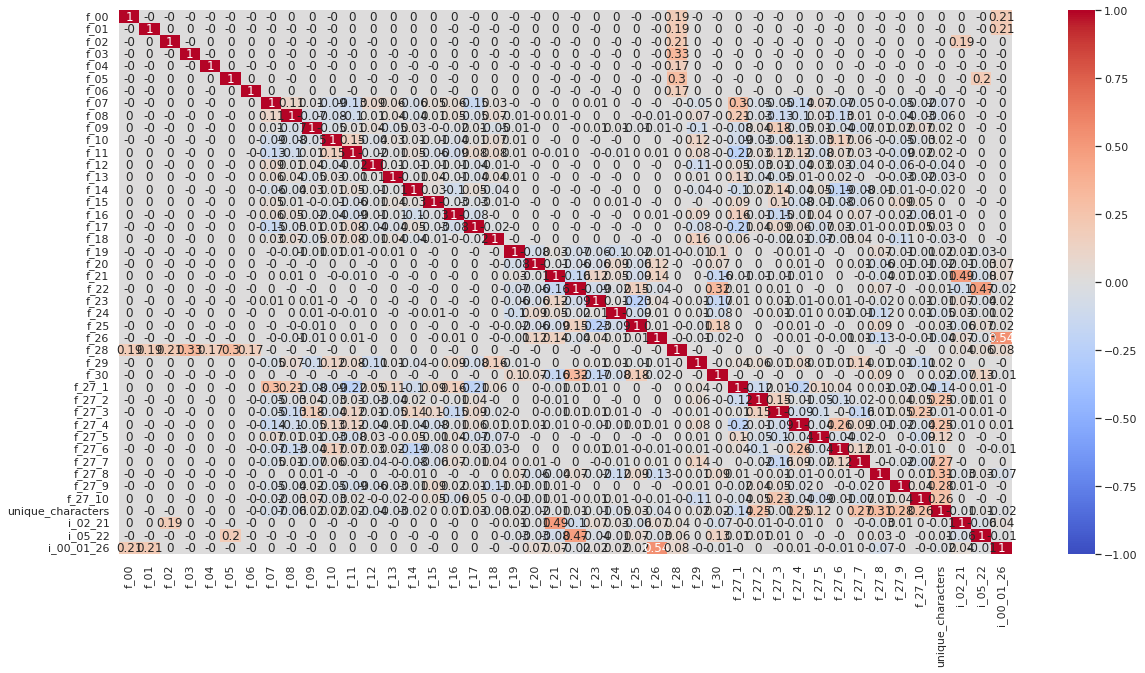

In [30]:
# Heatmap(df_test)

corr = df_test.drop(columns=['id']).corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

# Modeling

In [31]:
X = df_train.drop(columns=['id', 'target'])
value = df_train['target']

In [32]:
%%time
X_train, X_test, t_train, t_test = train_test_split(X, value, test_size=0.2, random_state=0)

lgb_train = lgb.Dataset(X_train, t_train)
lgb_eval = lgb.Dataset(X_test, t_test, reference=lgb_train)

params = {
    'task': 'prediction',
    'boosting_type': 'gbdt',
    'learning_rate': 0.02,#0.1
#    'max_depth': -1,
#    'min_data_in_leaf': 20,
    'objective': 'binary',
    'metric': 'auc',
    'feature_pre_filter': False,
    'lambda_l1': 0.003255453546550047,
    'lambda_l2': 7.699814899045444e-07,
    'num_leaves': 250,
    'feature_fraction': 1.0,
    'bagging_fraction': 0.8633093766811881,
    'bagging_freq': 4,
    'min_child_samples': 20,
    'num_iterations': 30000,#100
    'verbosity': -1
}


model = lgb.train(
    params,
    train_set=lgb_train,
    valid_sets=lgb_eval,
    early_stopping_rounds=500,#100
    verbose_eval=100
)

Training until validation scores don't improve for 500 rounds
[100]	valid_0's auc: 0.980459
[200]	valid_0's auc: 0.987761
[300]	valid_0's auc: 0.990825
[400]	valid_0's auc: 0.992695
[500]	valid_0's auc: 0.993861
[600]	valid_0's auc: 0.99461
[700]	valid_0's auc: 0.99507
[800]	valid_0's auc: 0.995463
[900]	valid_0's auc: 0.995697
[1000]	valid_0's auc: 0.995858
[1100]	valid_0's auc: 0.996005
[1200]	valid_0's auc: 0.996128
[1300]	valid_0's auc: 0.996166
[1400]	valid_0's auc: 0.996217
[1500]	valid_0's auc: 0.996278
[1600]	valid_0's auc: 0.99631
[1700]	valid_0's auc: 0.996345
[1800]	valid_0's auc: 0.996368
[1900]	valid_0's auc: 0.99641
[2000]	valid_0's auc: 0.996438
[2100]	valid_0's auc: 0.996473
[2200]	valid_0's auc: 0.996507
[2300]	valid_0's auc: 0.996532
[2400]	valid_0's auc: 0.996546
[2500]	valid_0's auc: 0.996566
[2600]	valid_0's auc: 0.996591
[2700]	valid_0's auc: 0.996592
[2800]	valid_0's auc: 0.996604
[2900]	valid_0's auc: 0.996623
[3000]	valid_0's auc: 0.996631
[3100]	valid_0's auc: